In [2]:
import numpy as np
import csv
from collections import defaultdict
import json
import matplotlib.pyplot as plt


## Data Visualization

In [3]:
movies = defaultdict(dict)
genres = set()

with open('./Dataset_MovieSummaries/movie.metadata.tsv') as f:
    movie_metadata = csv.reader(f, delimiter='\t')

    # Extracting genres from the metadata
    for line in movie_metadata:
         
        values = json.loads(line[8]).values()
        values = list(values)
        genres.update(values)

        # Adding genres to the movies dictionary
        for value in values:
            if value in movies:
                movies[value] += 1
            else:
                movies[value] = 1
                
movies = dict(sorted(movies.items(), key=lambda item: item[1]))

In [4]:
len(genres)

363

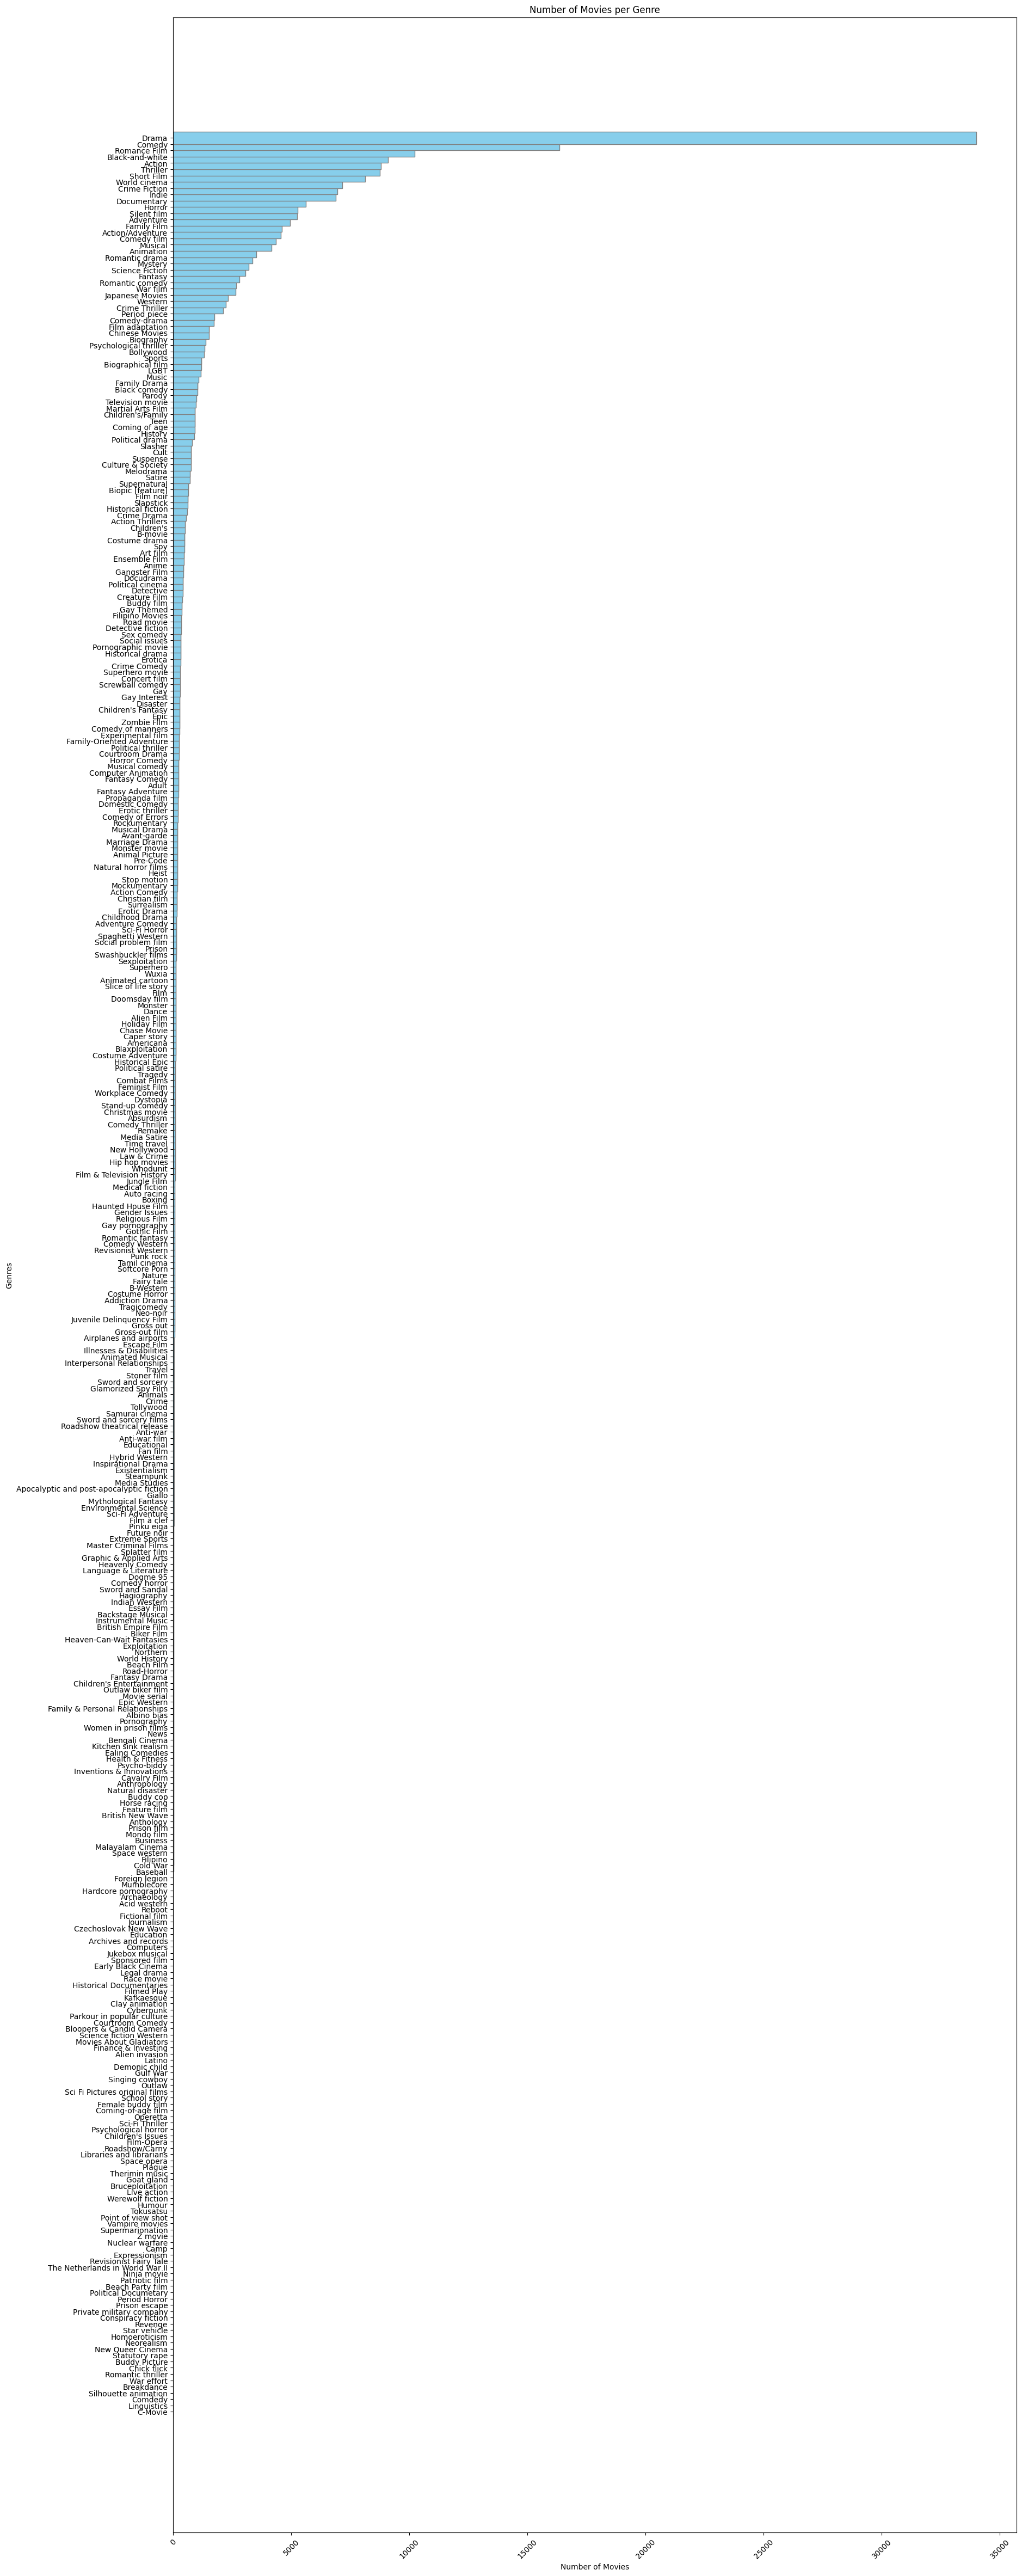

In [5]:
genres_names = list(movies.keys())
genres_counts = list(movies.values())


# Plot
plt.figure(figsize=(20, 60))
plt.barh(genres_names, genres_counts, color='skyblue',height=2, edgecolor='gray')

# Labels and title
plt.ylabel('Genres')
plt.xlabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()

/var/folders/d_/jp708lf135b9l3ffk1y090dr0000gn/T/ipykernel_83152/1694967278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=g, x="Genre", y="Count", palette= 'rainbow')


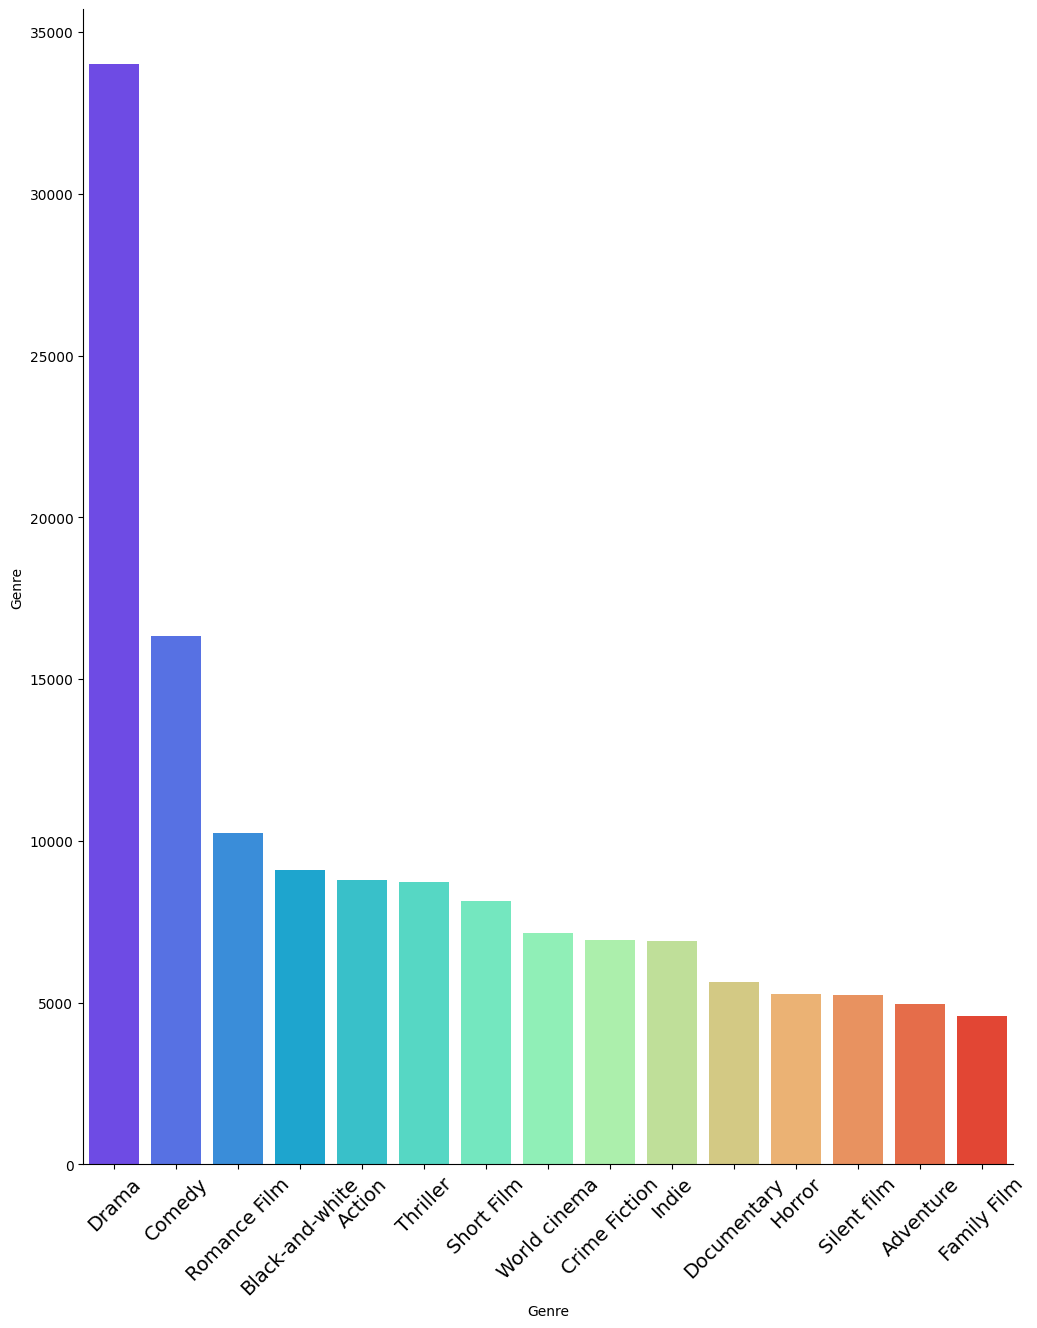

In [6]:
import pandas as pd
import seaborn as sns
all_genres_df = pd.DataFrame({'Genre': genres_names, 
                              'Count': genres_counts})
g = all_genres_df.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x="Genre", y="Count", palette= 'rainbow') 
ax.set(ylabel = 'Genre')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
plt.xticks(rotation=45)
plt.show()

In [8]:
for key,val in movies.items():
    if val >= 3000:
        print (key)

Science Fiction
Mystery
Romantic drama
Animation
Musical
Comedy film
Action/Adventure
Family Film
Adventure
Silent film
Horror
Documentary
Indie
Crime Fiction
World cinema
Short Film
Thriller
Action
Black-and-white
Romance Film
Comedy
Drama


## Dataset creation

In [18]:
movie_descriptions = []
dataset = {'desciption':[], 'labels':[]}

movie_genres = []
genres_ids = []

with open('../Dataset_MovieSummaries/movie.metadata.tsv') as f1:
    movie_genres_ = csv.reader(f1, delimiter='\t')

    # Extracting genres from the metadata
    for line in movie_genres_:
         
        genres = json.loads(line[8]).values()
        genres = list(genres)
        movie_genres.append(genres)
        id = json.loads(line[0])
        id = int(id)
        genres_ids.append(id)

# Creating a dict of movie ids as key and their genres and values.       
genres_and_ids = dict(zip(genres_ids, movie_genres))

with open('../Dataset_MovieSummaries/plot_summaries.txt') as f2:
    movie_description = csv.reader(f2, delimiter='\t')
    
    for line in movie_description:

        desciption = line[1]
        id = int(line[0])
        movie_descriptions.append(movie_descriptions)

        # Handling the movies that no genre methadata is available for them!
        if id in genres_and_ids:
            dataset['desciption'].append(desciption)
            dataset['labels'].append(genres_and_ids[id])
        

In [19]:
len(movie_genres)

81741

In [20]:
len(movie_descriptions)

42303

----> `For some movies no genre metadata is available .`

In [21]:
dataset

{'desciption': ["Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",
  'The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker\'s son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies an

In [ ]:
dataset['desciption'][0]

"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."

In [ ]:
dataset['labels'][0]

['Drama', 'World cinema']

In [ ]:
len(dataset['desciption'])

42204

In [ ]:
len(dataset['labels'])

42204

In [ ]:
missing = len(movie_descriptions) - len(dataset['desciption'])
print(f'There was no genre metadata available for {missing} movies!!')

There was no genre metadata available for 99 movies!!
